In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 50)


/home/rishabh/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
df=pd.read_csv('/home/rishabh/Desktop/office/lumiq/dummydata/phase_data_sample.csv')

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
count,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,...,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,17337.000000
mean,3.752486e-16,1.083263e-16,5.842295e-16,-3.521502e-16,8.790466e-17,-1.404188e-16,3.090623e-16,7.479933e-17,-4.415405e-17,1.839293e-16,-1.653872e-16,-1.109198e-16,1.352774e-16,5.502126e-17,-6.870614e-16,-1.402299e-16,-8.224693e-16,4.109080e-16,-1.805609e-16,-8.840416e-17,3.241785e-16,-4.323831e-17,-4.667074e-17,1.040230e-16,6.118170e-17,2.268250e-16,2.685488e-16,1.302977e-16,-2.628431e-16,-1.110671e-16,2.646297e-16,6.754705e-17,1.000398e-16,-3.442287e-16,-1.372522e-16,-6.495352e-17,1.534409e-16,-5.913185e-16,-7.030068e-17,-2.004511e-16,-4.812439e-17,-1.566748e-16,-3.174353e-17,3.334447e-16,1.949310e-16,-1.721079e-16,-4.490673e-16,-1.328016e-16,3.218091e-16,-7.268929e-17,-4.694610e-16,6.078786e-17,-2.383086e-15,-2.436356e-15,9.904884e-16,-2.172767e-15,-1.325970e-15,1.027678e-15,-8.395193e-16,2.645689e-16,7.841554e-16,-3.520989e-16,-1.418565e-16,1.174812e-15,4.769974e-16,...,1.017714e-15,5.630202e-16,-5.283629e-16,-8.504217e-18,-1.338274e-15,2.417058e-16,-1.649280e-15,2.110045e-17,-3.136571e-16,-3.367747e-16,2.704828e-16,-6.864402e-16,-6.048497e-16,4.121408e-16,-5.308476e-16,2.123749e-16,1.449175e-16,-4.905742e-16,1.083058e-15,1.505836e-15,-1.460958e-16,-6.798507e-16,-3.471808e-16,-5.021843e-16,7.548774e-17,-4.112410e-16,2.548960e-16,2.408077e-16,5.782484e-16,-3.399958e-16,2.559206e-16,5.214132e-16,3.884692e-16,-9.854518e-16,1.741110e-15,-4.751603e-17,-8.311912e-16,2.396678e-16,-2.761181e-16,9.121157e-16,4.298600e-16,-3.723845e-16,1.837052e-16,-2.104179e-15,-6.310667e-16,-3.873441e-15,1.165039e-15,1.386125e-15,-2.366627e-15,1.061987e-15,1.448800e-15,1.194055e-15,-3.319719e-17,-1.302551e-15,-1.393893e-15,8.232697e-16,-2.080043e-16,-2.399240e-16,-2.143290e-15,-1.171299e-15,1.745990e-16,-1.149830e-16,2.118434e-16,7.549926e-16,5.964527
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.00002

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,0.510428,0.602834,-2.611784,-0.655756,1.971535,-0.699091,0.275910,-0.123512,-1.649618,0.226110,-1.663660,-0.854073,-0.254454,0.390958,-0.006717,-1.384508,-1.564886,-1.469919,-0.758258,-0.264166,0.555455,0.429307,-0.683309,0.864091,0.335840,0.273424,0.912177,1.417625,-1.503210,-3.229948,0.309263,-0.958911,-0.561021,-0.186811,-1.674358,0.087865,-0.156046,-1.718038,0.075944,-0.949454,-0.546214,-0.158087,-0.415936,-0.552641,-0.384329,-0.428871,-0.346411,-0.399375,-0.392835,-0.341224,0.939621,-1.848086,0.835272,-2.699907,1.664515,...,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832,0
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,2.227854,0.488801,0.869589,0.524477,-0.072759,-0.372948,0.410288,1.633895,-0.080093,-0.662573,0.126520,-0.068859,-1.015324,0.470486,-1.665262,-1.051583,-0.419912,-1.908337,-2.694637,0.203448,0.797356,0.672867,-0.556727,-0.223796,-1.032485,-0.558210,-0.183893,-1.217633,0.999451,0.312074,-1.045948,-0.451498,0.228375,0.773793,1.185013,-0.111135,-2.458225,0.635025,-0.756338,-0.045011,-0.546214,-0.158087,-0.073106,-0.552641,-0.384329,-0.182729,-0.346411,-0.005420,0.010922,-0.341224,0.108530,0.575377,0.086622,-2.699907,1.664515,...,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832,1
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,-0.131271,-0.143971,0.214676,0.261350,-0.221840,0.210723,0.368094,0.339829,0.201755,0.140167,-0.252236,0.211500,-0.322554,-0.225943,-0.069276,0.732342,0.244520,0.384309,0.131573,0.069193,-1.182271,0.285562,0.255605,0.461599,-0.110563,0.160692,-0.257467,-0.275564,0.005752,-0.057336,-0.387577,0.153561,-0.095784,-0.152400,0.107925,-0.200695,-0.448275,-0.271764,-0.363180,-0.262740,1.492851,-0.158087,-0.073106,-0.552641,0.558302,0.008714,-0.346411,-0.399375,-0.392835,-0.341224,0.364250,0.548745,-0.028555,-2.699907,1.664515,...,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.44488,-2.560023,-0.756626,-0.17203,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.70438,0.558248,-1.03424,1.260648,0.854761,0.738142,1.862321,1.591342,-1.48227,-3.02827,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,

In [10]:
col=list(df.columns)
col.pop()


'label'

In [11]:
col

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[col],df['label'], test_size=0.33, random_state=42)

In [13]:
print(X_train.shape,X_test.shape,y_test.shape)

(11615, 134) (5722, 134) (5722,)


In [14]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
lr.score(X_test, y_test)

0.7797972736805313

In [16]:
correlation=df.corr()

In [17]:
# seperating low correlation values (both negative and positve)
correlation=correlation.where(  ((correlation>0.25)& (correlation<1)) | ((correlation<-0.25)& (correlation > -1)))
correlation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
0,NaN,-0.317243,NaN,NaN,NaN,NaN,NaN,NaN,0.314963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.311080,NaN,NaN,NaN,0.261886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.317243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.303299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.255354,NaN,0.260452,NaN,-0.332790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.382656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.371520,NaN,NaN,NaN,NaN,NaN,0.429656,0.371574,NaN,NaN,0.479244,NaN,NaN,NaN,NaN,0.37954,NaN,0.427374,NaN,NaN,NaN,-0.347712,NaN,NaN,0.348628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.315189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261186,NaN,NaN,0.277396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.317050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310863
3,NaN,NaN,0.382656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.312523,NaN,NaN,NaN,NaN,NaN,0.304194,0.282146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.354351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.267423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [18]:
correlation['label'].dropna().sort_values()

72    -0.493181
113   -0.458178
76    -0.418460
100   -0.406370
68    -0.311310
98    -0.307367
37    -0.304079
30    -0.296455
58    -0.293799
57    -0.288265
79    -0.283152
55    -0.256629
59    -0.255661
70     0.276663
23     0.291115
78     0.302621
94     0.305197
2      0.310863
71     0.354785
86     0.355714
96     0.386040
85     0.413235
97     0.437358
65     0.437457
Name: label, dtype: float64

In [19]:
correlated_columns=correlation['label'].dropna().index
correlated_columns

Index(['2', '23', '30', '37', '55', '57', '58', '59', '65', '68', '70', '71',
       '72', '76', '78', '79', '85', '86', '94', '96', '97', '98', '100',
       '113'],
      dtype='object')

In [20]:
df['label'].value_counts()

5     3704
9     3138
1     2604
0     1821
8     1678
14    1487
7     1283
2      615
10     418
3      145
15     128
6      100
13      92
11      91
4       22
16       9
12       2
Name: label, dtype: int64

In [30]:
# add target variable label in correlated df
correlated_columns=list(correlated_columns)
correlated_columns.append('label')


In [31]:
df_aftercorrelation=df[correlated_columns]

In [32]:
df_aftercorrelation.shape

(17337, 25)

In [33]:
df_aftercorrelation.describe()


,2,23,30,37,55,57,58,59,65,68,70,71,72,76,78,79,85,86,94,96,97,98,100,113,label
count,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,17337.000000
mean,5.842295e-16,1.040230e-16,2.646297e-16,-5.913185e-16,-2.172767e-15,1.027678e-15,-8.395193e-16,2.645689e-16,-5.460117e-16,4.188199e-16,1.017714e-15,5.630202e-16,-5.283629e-16,-1.649280e-15,-3.136571e-16,-3.367747e-16,2.123749e-16,1.449175e-16,7.548774e-17,2.548960e-16,2.408077e-16,5.782484e-16,2.559206e-16,-2.104179e-15,5.964527
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,4.172304
min,-3.958322e+00,-4.565710e+00,-2.720046e+00,-4.235539e+00,-4.562197e-01,-3.993747e-01,-3.928351e-01,-3.412237e-01,-1.611498e+00,-1.977980e+00,-1.659385e+00,-1.803755e+00,-1.415165e+00,-4.285133e+00,-2.331478e+00,-2.385124e+00,-1.576500e+00,-1.871810e+00,-1.891371e+00,-1.730411e+00,-1.525665e+00,-1.953351e+00,-1.731141e+00,-4.606605e-01,0.000000
25%,-7.217110e-01,-6.137121e-01,-1.044458e+00,-5.752774e-01,-4.015216e-01,-3.993747e-01,-3.928351e-01,-3.412237e-01,-1.107209e+00,-5.337682e-01,-9.822275e-01,-3.740195e-01,-8.480553e-01,-5.273594e-01,-9.003605e-01,-2.422437e-01,-2.493614e-01,-5.807881e-01,-1.527739e+00,-3.443404e-01,-1.398840e+00,-8.141684e-01,-6.289555e-01,-4.606605e-01,1.000000
50%,3.020581e-02,-2.259432e-01,-6.147631e-03,-1.164339e-01,-2.921254e-01,-3.993747e-01,-3.928351e-01,-3.412237e-01,5.062139e-01,-1.400055e-01,2.633977e-01,6.488913e-01,-5.819921e-02,7.369194e-02,9.594695e-02,2.925215e-01,-2.493614e-01,-5.807881e-01,4.461807e-01,3.664788e-02,8.487440e-02,5.050060e-01,-1.175949e-01,-4.606605e-01,5.000000
75%,5.940180e-01,5.616441e-01,8.678219e-01,6.397698e-01,-7.333305e-02,-5.419526e-03,1.092244e-02,-3.412237e-01,5.549198e-01,9.363621e-01,8.095553e-01,6.488913e-01,2.994180e-01,2.392765e-01,9.143877e-01,7.553058e-01,5.174936e-01,5.689633e-01,5.881039e-01,8.291905e-01,9.712746e-01,5.934953e-01,6.368203e-01,-4.606605e-01,9.000000
max,3.624895e+00,5.566909e+00,1.728630e+00,4.853135e+00,1.379263e+01,1.535883e+01,1.474807e+01,1.611834e+01,2.113088e+00,2.200728e+00,1.711205e+00,2.210359e+00,1.890017e+00,1.626802e+00,1.228198e+00,2.605124e+00,1.510442e+00,2.551581e+00,1.734370e+00,1.260648e+00,1.427935e+00,2.944886e+00,1.591342e+00,2.170796e+00,16.000000


In [34]:
cols=list(df_aftercorrelation.columns)
cols

['2',
 '23',
 '30',
 '37',
 '55',
 '57',
 '58',
 '59',
 '65',
 '68',
 '70',
 '71',
 '72',
 '76',
 '78',
 '79',
 '85',
 '86',
 '94',
 '96',
 '97',
 '98',
 '100',
 '113',
 'label']

In [35]:
cols.pop()

'label'

In [36]:
cols

['2',
 '23',
 '30',
 '37',
 '55',
 '57',
 '58',
 '59',
 '65',
 '68',
 '70',
 '71',
 '72',
 '76',
 '78',
 '79',
 '85',
 '86',
 '94',
 '96',
 '97',
 '98',
 '100',
 '113']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_aftercorrelation[cols], df_aftercorrelation['label'], test_size=0.33, random_state=42)

In [38]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

lr.score(X_test, y_test)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5914016078294303

In [59]:
correlation=df.corr()

In [60]:

correlation=correlation.where(  ((correlation>0.15)& (correlation<1)) | ((correlation<-0.15)& (correlation > -1)))
correlation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
0,NaN,-0.317243,0.161920,NaN,NaN,NaN,NaN,NaN,0.314963,NaN,NaN,NaN,0.191748,NaN,NaN,NaN,-0.167514,-0.177915,0.267601,-0.154000,NaN,NaN,NaN,NaN,0.223368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.182768,-0.170316,NaN,NaN,NaN,NaN,0.311080,0.220446,-0.209947,NaN,0.261886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160679,NaN,...,NaN,NaN,NaN,NaN,NaN,0.164824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.153704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.317243,NaN,NaN,NaN,0.243159,NaN,NaN,NaN,-0.303299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.337583,0.238779,NaN,NaN,NaN,NaN,-0.162994,-0.198528,NaN,NaN,NaN,NaN,0.293581,NaN,NaN,NaN,NaN,-0.207120,0.238226,NaN,0.243860,NaN,NaN,NaN,NaN,-0.255354,-0.205835,0.260452,NaN,-0.332790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.152121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.175129,NaN,NaN,NaN,-0.152777,NaN,NaN,NaN,-0.162039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.171920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.161920,NaN,NaN,0.382656,NaN,-0.177951,NaN,NaN,0.193079,-0.176911,-0.227909,NaN,NaN,NaN,NaN,NaN,-0.371520,NaN,NaN,NaN,NaN,-0.170686,0.429656,0.371574,NaN,NaN,0.479244,-0.201512,NaN,-0.153235,NaN,0.379540,NaN,0.427374,NaN,-0.172638,NaN,-0.347712,NaN,NaN,0.348628,0.180961,NaN,NaN,NaN,NaN,-0.168482,NaN,0.224257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.232335,NaN,NaN,NaN,...,0.249975,0.201762,-0.315189,NaN,NaN,NaN,-0.246653,NaN,0.208147,NaN,NaN,NaN,NaN,NaN,-0.181529,0.309483,0.168400,NaN,NaN,NaN,NaN,-0.172400,NaN,NaN,0.261186,NaN,0.212261,0.277396,-0.151360,NaN,-0.245177,NaN,NaN,-0.173911,NaN,-0.161834,NaN,-0.188057,NaN,NaN,NaN,NaN,NaN,-0.317050,NaN,NaN,0.192771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310863
3,NaN,NaN,0.382656,NaN,NaN,-0.237235,NaN,0.153656,NaN,-0.153150,NaN,NaN,NaN,NaN,NaN,NaN,-0.312523,NaN,NaN,NaN,NaN,-0.174852,0.304194,0.282146,-0.170153,NaN,0.197040,NaN,NaN,-0.195067,NaN,0.179768,NaN,0.290314,NaN,-0.213442,NaN,-0.172629,NaN,-0.162995,0.223283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164786,NaN,NaN,NaN,...,NaN,NaN,-0.186781,NaN,NaN,NaN,-0.151163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177010,0.178090,NaN,NaN,-0.151154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207681
4,NaN,0.243159,NaN,NaN,NaN,NaN,NaN,NaN,-0.354351,NaN,NaN,NaN,-0.201068,0.189945,0.168723,NaN,0.222824,-0.164078,-0.221777,NaN,NaN,NaN,NaN,NaN,-0.154643,NaN,NaN,NaN,NaN,NaN,0.243013,-0.159276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152583,-0.198034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.267423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.157887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [61]:
correlation['label'].dropna().sort_values()

72    -0.493181
113   -0.458178
76    -0.418460
100   -0.406370
68    -0.311310
         ...   
86     0.355714
96     0.386040
85     0.413235
97     0.437358
65     0.437457
Name: label, Length: 59, dtype: float64

In [62]:
correlated_columns=correlation['label'].dropna().index
correlated_columns

Index(['2', '3', '5', '11', '14', '16', '18', '23', '26', '29', '30', '32',
       '33', '37', '39', '40', '41', '51', '52', '55', '56', '57', '58', '59',
       '63', '65', '66', '67', '68', '70', '71', '72', '73', '74', '76', '78',
       '79', '81', '82', '84', '85', '86', '89', '91', '93', '94', '96', '97',
       '98', '99', '100', '105', '108', '111', '112', '113', '116', '121',
       '126'],
      dtype='object')

In [63]:
correlated_columns=list(correlated_columns)
correlated_columns.append('label')
correlated_columns

['2',
 '3',
 '5',
 '11',
 '14',
 '16',
 '18',
 '23',
 '26',
 '29',
 '30',
 '32',
 '33',
 '37',
 '39',
 '40',
 '41',
 '51',
 '52',
 '55',
 '56',
 '57',
 '58',
 '59',
 '63',
 '65',
 '66',
 '67',
 '68',
 '70',
 '71',
 '72',
 '73',
 '74',
 '76',
 '78',
 '79',
 '81',
 '82',
 '84',
 '85',
 '86',
 '89',
 '91',
 '93',
 '94',
 '96',
 '97',
 '98',
 '99',
 '100',
 '105',
 '108',
 '111',
 '112',
 '113',
 '116',
 '121',
 '126',
 'label']

In [65]:


df_aftercorrelation=df[correlated_columns]

df_aftercorrelation.shape

df_aftercorrelation.describe()


cols=list(df_aftercorrelation.columns)
cols.pop()
cols

['2',
 '3',
 '5',
 '11',
 '14',
 '16',
 '18',
 '23',
 '26',
 '29',
 '30',
 '32',
 '33',
 '37',
 '39',
 '40',
 '41',
 '51',
 '52',
 '55',
 '56',
 '57',
 '58',
 '59',
 '63',
 '65',
 '66',
 '67',
 '68',
 '70',
 '71',
 '72',
 '73',
 '74',
 '76',
 '78',
 '79',
 '81',
 '82',
 '84',
 '85',
 '86',
 '89',
 '91',
 '93',
 '94',
 '96',
 '97',
 '98',
 '99',
 '100',
 '105',
 '108',
 '111',
 '112',
 '113',
 '116',
 '121',
 '126']

In [66]:
cols

['2',
 '3',
 '5',
 '11',
 '14',
 '16',
 '18',
 '23',
 '26',
 '29',
 '30',
 '32',
 '33',
 '37',
 '39',
 '40',
 '41',
 '51',
 '52',
 '55',
 '56',
 '57',
 '58',
 '59',
 '63',
 '65',
 '66',
 '67',
 '68',
 '70',
 '71',
 '72',
 '73',
 '74',
 '76',
 '78',
 '79',
 '81',
 '82',
 '84',
 '85',
 '86',
 '89',
 '91',
 '93',
 '94',
 '96',
 '97',
 '98',
 '99',
 '100',
 '105',
 '108',
 '111',
 '112',
 '113',
 '116',
 '121',
 '126']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_aftercorrelation[cols], df_aftercorrelation['label'], test_size=0.33, random_state=42)

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

lr.score(X_test, y_test)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6908423628102062

In [83]:
df[['1','2']].describe()

,1,2
count,1.733700e+04,1.733700e+04
mean,1.083263e-16,5.842295e-16
std,1.000029e+00,1.000029e+00
min,-4.597059e+00,-3.958322e+00
25%,-4.135612e-01,-7.217110e-01
50%,-1.654807e-01,3.020581e-02
75%,6.761393e-01,5.940180e-01
max,4.301265e+00,3.624895e+00


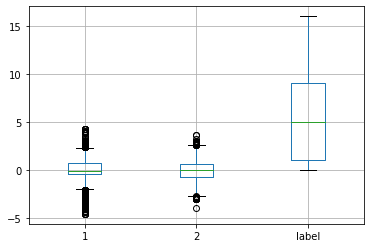

In [88]:
df.boxplot(column=['1','2','label'])

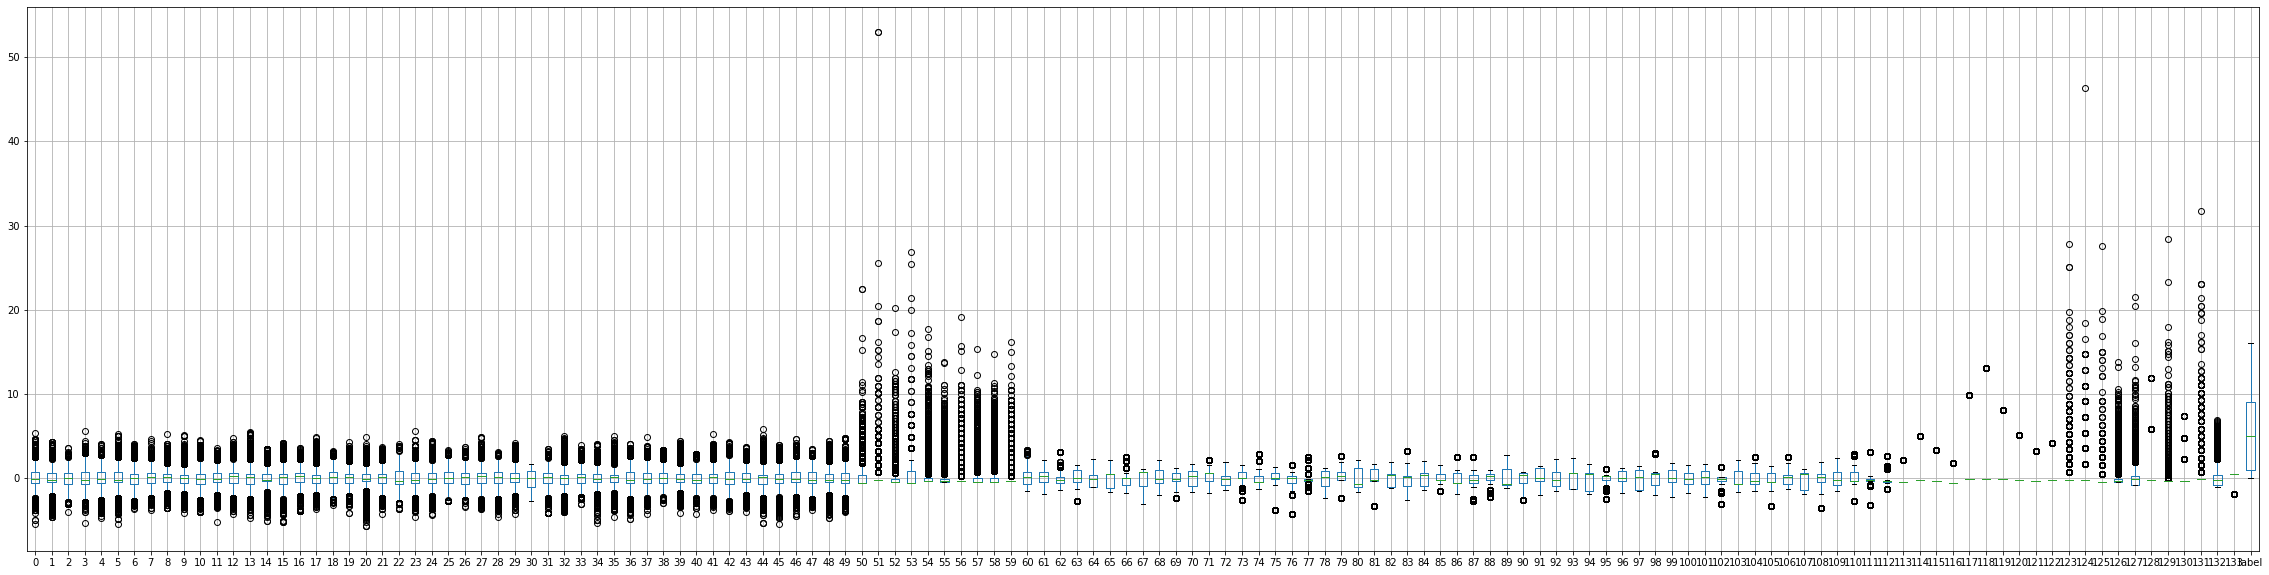

In [101]:
plt.figure(figsize=(40,10))
df.boxplot(column=list(df.columns))

In [99]:
a=list(df.columns)